In [44]:
import numpy as np                #to perform a variety of arithmetic operations on array
import pandas as pd               #for quantitative analysis
import matplotlib.pyplot as plt   #plotting
import seaborn as sns             #comes under matplotllib, for visualizing random distribution
color=sns.color_palette()
import plotly.offline as py            #to initialise plots inside a notebook
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
pd.options.mode.chained_assignment=None
import warnings

In [2]:
fd=pd.read_csv("startup_funding.csv")
fd.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,9/1/2020,BYJU�S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [3]:
fd.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [4]:
print("(Rows,Colums)=",fd.shape)

(Rows,Colums)= (3044, 10)


In [5]:
#formulas
total=fd.isnull().sum().sort_values(ascending=False)
percent=(((fd.isnull().sum())/(fd.isnull().count()))*100).sort_values(ascending=False)
#fd.isnull().count() it returns total number of rowsirrespective of the missing values
#fd.isnull().sum() it returns the number of rows which are null
#fd.count() gives the total number of rows excluding the null rows


missing_data=pd.concat([total,percent],axis=1,keys=['Total', 'Percent %'])
missing_data.head()

,Total,Percent %
Remarks,2625,86.235217
Amount in USD,964,31.668857
SubVertical,936,30.749014
City Location,180,5.913272
Industry Vertical,171,5.617608


In [6]:
#from the above table the remarks column does not contain any info therfore deleting it
del fd["Remarks"]
fd.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,9/1/2020,BYJU�S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [7]:
print(type("fd"))
print(type("Amount in USD"))
print(type("Startup Name"))

<class 'str'>
<class 'str'>
<class 'str'>


In [8]:
#fd.loc[20,"Amount in USD"]="4,20,00,000"
#fd.loc[89,"Amount in USD"]="4,20,00,000"
#fd.loc[91,"Amount in USD"]="4,20,00,000"
#fd.loc[fd["Amount in USD"]=="undisclosed"]

In [9]:
#since "Amount in USD" is a str we need to convert it else numeric operations wont work
fd["Amount in USD"] = fd["Amount in USD"].apply(lambda x: float(str(x).replace(",","")))
fd["Amount in USD"] = pd.to_numeric(fd["Amount in USD"])
fd.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,9/1/2020,BYJU�S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [10]:
#now we will fix the Date cloumn and write proper format
fd['Date dd/mm/yyyy'][fd['Date dd/mm/yyyy']=='12/05.2015'] = '12/05/2015'
fd['Date dd/mm/yyyy'][fd['Date dd/mm/yyyy']=='13/04.2015'] = '13/04/2015'
fd['Date dd/mm/yyyy'][fd['Date dd/mm/yyyy']=='15/01.2015'] = '15/01/2015'
fd['Date dd/mm/yyyy'][fd['Date dd/mm/yyyy']=='22/01//2015'] = '22/01/2015'

In [11]:
# How much funds does startups generally get in India ?
#(maximum funding, minimum funding , average funding and number of fundings)

print("On Average indian startups got funding of : ",fd["Amount in USD"].dropna().sort_values().mean())

On Average indian startups got funding of :  18333394.646259617


In [12]:
#data of the startup who got more than average fundings
print("Startups reciving more than average fundings:")
fd[fd["Amount in USD"]>=18333394.646259617]

Startups reciving more than average fundings:


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,9/1/2020,BYJU�S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
6,7,10/1/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,150000000.0
8,9,6/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,70000000.0
9,10,3/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,50000000.0
...,...,...,...,...,...,...,...,...,...
3010,3011,14/01/2015,RateGain,NaN,NaN,NaN,TA Associates,Private Equity,50000000.0
3013,3014,18/01/2015,ShopClues,NaN,NaN,NaN,Tiger Global & Other investors,Private Equity,100000000.0
3032,3033,22/01/2015,Antuit,NaN,NaN,NaN,"Goldman Sachs, Zodius Capital",Private Equity,56000000.0
3033,3034,22/01/2015,Caratlane.com,NaN,NaN,NaN,Tiger Global,Private Equity,31000000.0


In [13]:
#data of startup who got highest funding
HF=[fd["Amount in USD"].max()]
print("Maximum funding recived:")
HF

Maximum funding recived:


[3900000000.0]

In [14]:
#taking the above value
print("Startup details to recive Maximum Funding:")
fd[fd["Amount in USD"]==3900000000]

Startup details to recive Maximum Funding:


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
60,61,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,3.900000e+09


In [15]:
print("Details of BYJULS")
fd[fd["Startup Name"]=="BYJU�S"]

Details of BYJULS


,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
0,1,9/1/2020,BYJU�S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0


Total startups funded :  2457
Swiggy       8
Ola Cabs     8
Paytm        7
Meesho       6
NoBroker     6
UrbanClap    6
Medinfi      6
Nykaa        6
Grofers      5
Moglix       5
Name: Startup Name, dtype: int64


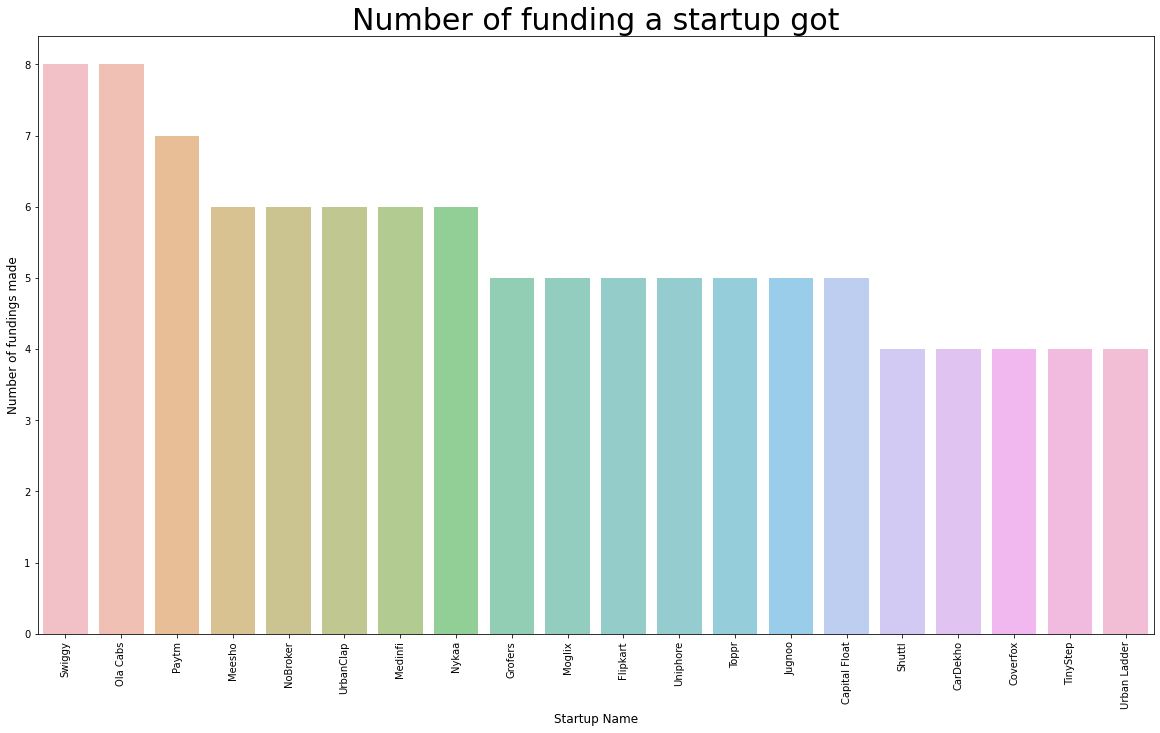

In [46]:
#compnay who got maximum number funding
print("Total startups funded : ", len(fd["Startup Name"].unique()))
print(fd["Startup Name"].value_counts().head(10))
startupname = fd['Startup Name'].value_counts().head(20)
plt.figure(figsize=(20,11))
sns.barplot(startupname.index, startupname.values, alpha=0.6)
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of funding a startup got", fontsize=30)
plt.show()
warnings.filterwarnings("ignore")

In [17]:
            #INDSUATRY VERTICLE
#Which industries are favored by investors for funding ?
#Which type of startups get fundings more easily?

industry = fd['Industry Vertical'].value_counts().head(10)
print(industry)
#here we displayed top 10 categories

Consumer Internet    941
Technology           478
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       23
Name: Industry Vertical, dtype: int64


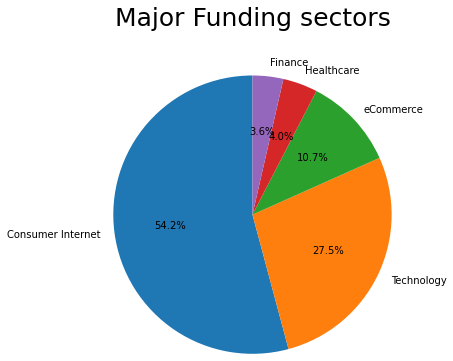

In [48]:
fundings = fd.groupby(["Industry Vertical"]).size()
industry = fd['Industry Vertical'].value_counts().head()
plt.title('Major Funding sectors',fontsize=25,pad=80)
plt.pie(industry.values, labels = ['Consumer Internet','Technology','eCommerce','Healthcare','Finance'],autopct='%1.1f%%',radius = 1.6,startangle=90)
plt.show()

In [19]:
#SUBCATEGORIES:SUB VERTICLE
industrysub = fd['SubVertical'].value_counts().head(10)
print(industry)      

Consumer Internet    941
Technology           478
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       23
Name: Industry Vertical, dtype: int64


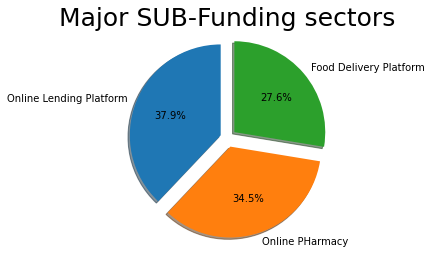

In [20]:
#displaaying a pie chart
industrysub = fd['SubVertical'].value_counts().head(3)
explode=(0.08,0.1,0.1)
labels=['Online Lending Platform','Online PHarmacy','Food Delivery Platform']
fig, ax=plt.subplots()
ax.pie(industrysub.values,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis('equal')                  # equal aspect ratio and she was the pie chart is circular
ax.set_title('Major SUB-Funding sectors',fontsize=25)
plt.show()

In [21]:
#which cities are having maximum startups.
fd.rename(columns={'City  Location':'City Location'},inplace=True)  #changing column name
cities = fd['City Location'].value_counts().head()
fd['City Location'][fd['City Location'] == 'Bengaluru'] = 'Bangalore'
print(cities)

Bangalore    701
Mumbai       568
New Delhi    424
Gurgaon      291
Bengaluru    141
Name: City Location, dtype: int64


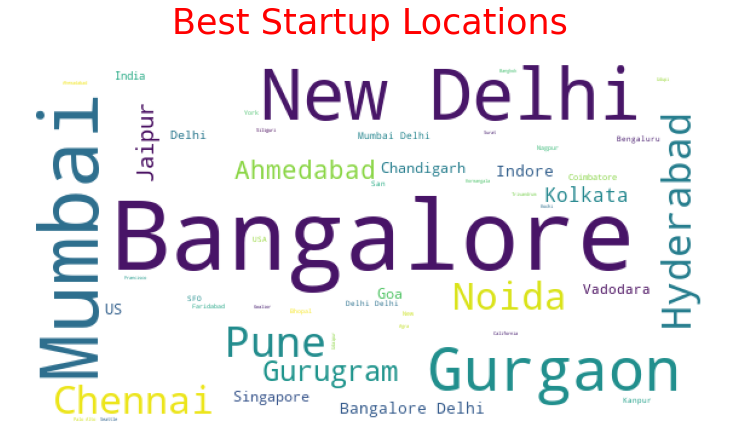

In [22]:
from wordcloud import WordCloud
names = fd["City Location"][~pd.isnull(fd["City Location"])]
wordcloud = WordCloud(background_color='white',max_font_size=80, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(13,8))
plt.imshow(wordcloud)
plt.title("Best Startup Locations", fontsize=35,pad=30,color='red')
plt.axis("off")
plt.show()

In [23]:
#Names of TOP 5 important investors
print("TOP FIVE INVESTORS:")
names = fd["Investors Name"][~pd.isnull(fd["Investors Name"])].head(5)
print(names)

TOP FIVE INVESTORS:
0      Tiger Global Management
1    Susquehanna Growth Equity
2        Sequoia Capital India
3               Vinod Khatumal
4      Sprout Venture Partners
Name: Investors Name, dtype: object


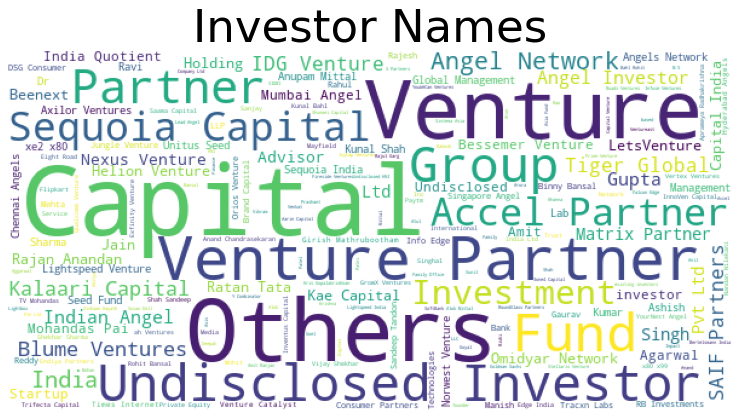

In [24]:
names = fd["Investors Name"][~pd.isnull(fd["Investors Name"])]
wordcloud = WordCloud(background_color='white',max_font_size=80, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(13,8))
plt.imshow(wordcloud)
plt.title("Investor Names", fontsize=45)
plt.axis("off")
plt.show()

In [56]:
#different types of funding for startups
print("Types of funding for startups:")
investment = fd['InvestmentnType'].value_counts().head()
print(investment)

#cleaning
fd['InvestmentnType'][fd['InvestmentnType'] == 'SeedFunding'] = 'Seed Funding'
fd['InvestmentnType'][fd['InvestmentnType'] == 'Seed Angel Funding'] = 'Seed Funding'
fd['InvestmentnType'][fd['InvestmentnType'] == 'Seed / Angel Funding'] = 'Seed Funding'

fd['InvestmentnType'][fd['InvestmentnType'] == 'Seed/Angel Funding'] = 'Seed Funding'
fd['InvestmentnType'][fd['InvestmentnType'] == 'Seed/Angel Funding'] = 'Seed Funding'
fd['InvestmentnType'][fd['InvestmentnType'] == 'Seed\\nFunding'] = 'Seed Funding'
fd['InvestmentnType'][fd['InvestmentnType'] == 'Seed / Angle Funding'] = 'Seed Funding'
fd['InvestmentnType'][fd['InvestmentnType'] == 'Angel / Seed Funding'] = 'Seed Funding'

fd['InvestmentnType'][fd['InvestmentnType'] == 'Crowd funding'] = 'Crowd Funding'
fd['InvestmentnType'][fd['InvestmentnType'] == 'PrivateEquity'] = 'Private Equity'
fd['InvestmentnType'][fd['InvestmentnType'] == 'Private Equity Round'] = 'Private Equity'


Types of funding for startups:
Seed Funding           1436
Private Equity         1361
Seed/ Angel Funding      60
Seed\\nFunding           30
Debt Funding             25
Name: InvestmentnType, dtype: int64


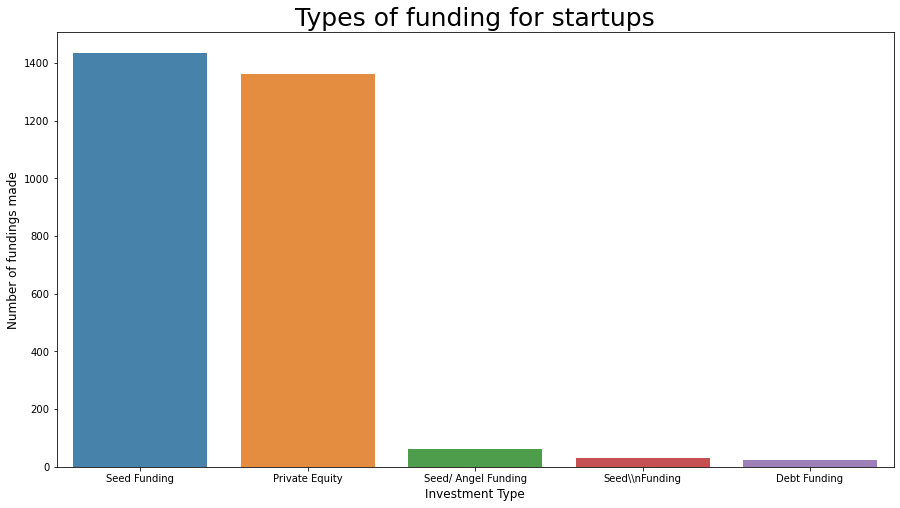

In [57]:
plt.figure(figsize=(15,8))
sns.barplot(investment.index, investment.values, alpha=0.9)
plt.xticks(rotation='horizontal')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Types of funding for startups", fontsize=25)
plt.show()
warnings.filterwarnings("ignore")

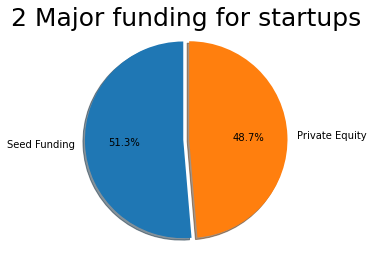

In [58]:
investment = fd['InvestmentnType'].value_counts().head(2)
explode=(0.03,0.03)
labels=['Seed Funding','Private Equity']
fig, ax=plt.subplots()
ax.pie(investment.values,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax.axis('equal')                  # equal aspect ratio and she was the pie chart is circular
ax.set_title('2 Major funding for startups',fontsize=25)
plt.show()

In [28]:
#a raised column is created giving true or false value of the below criteria
fd.loc[fd['Amount in USD']>18000000,'raised'] = 1
fd.loc[fd['Amount in USD']<=18000000,'raised'] = 0
fd.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,raised
0,1,9/1/2020,BYJU�S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,1.0
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,0.0
2,3,9/1/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,1.0
3,4,2/1/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,0.0
4,5,2/1/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,0.0


In [29]:
#calculating 5 years of survival
fd["Date dd/mm/yyyy"] = fd["Date dd/mm/yyyy"].apply(lambda x: float(str(x).replace("/","")))
fd["Date dd/mm/yyyy"] = pd.to_numeric(fd["Date dd/mm/yyyy"])
#fd.head()
#fd['Age_today'] = 2021-fd['Date dd/mm/yyyy']
fd.head()
p=fd["Date dd/mm/yyyy"]%10000
p

0       2020.0
1       2020.0
2       2020.0
3       2020.0
4       2020.0
         ...  
3039    2015.0
3040    2015.0
3041    2015.0
3042    2015.0
3043    2015.0
Name: Date dd/mm/yyyy, Length: 3044, dtype: float64

In [30]:
fd['Date dd/mm/yyyy'] = p.apply(int)
fd.rename(columns={'Date dd/mm/yyyy':'Year'},inplace=True) 
fd.head()

,Sr No,Year,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,raised
0,1,2020,BYJU�S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity,200000000.0,1.0
1,2,2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,0.0
2,3,2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0,1.0
3,4,2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,0.0
4,5,2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,0.0


In [31]:
fd['Age'] = 2021-fd['Year']
fd.tail()

,Sr No,Year,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,raised,Age
3039,3040,2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0,0.0,6
3040,3041,2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0,0.0,6
3041,3042,2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,0.0,6
3042,3043,2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,NaN,6
3043,3044,2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,140000.0,0.0,6


In [32]:
#creating a colum to give true value for more than 5 years
fd["5years"] = np.where(fd['Age'] >= 5, 1, 0)
fd.tail()

,Sr No,Year,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,raised,Age,5years
3039,3040,2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,4500000.0,0.0,6,1
3040,3041,2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,825000.0,0.0,6,1
3041,3042,2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,0.0,6,1
3042,3043,2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,NaN,6,1
3043,3044,2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,140000.0,0.0,6,1


In [33]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
fd=fd.fillna(fd.mean())
fd['raised'] = p.apply(int)

In [35]:
#confusion matrix para
y=fd['raised']
X=fd.drop(['raised','Startup Name','Industry Vertical','SubVertical','City Location','Investors Name','InvestmentnType'],axis=1)
print(X.head())
print(y.head())
type('raised')

   Sr No  Year  Amount in USD  Age  5years
0      1  2020    200000000.0    1       0
1      2  2020      8048394.0    1       0
2      3  2020     18358860.0    1       0
3      4  2020      3000000.0    1       0
4      5  2020      1800000.0    1       0
0    2020
1    2020
2    2020
3    2020
4    2020
Name: raised, dtype: int64


str

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
scale=scaler.fit(X_train)
X_train=scale.transform(X_train)
X_test=scale.transform(X_test)

In [53]:
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
warnings.filterwarnings("ignore")

In [38]:
score=accuracy_score(y_test,pred)
score

0.9605911330049262

In [39]:
confusion_matrix(y_test,pred)

array([[179,   0,   0,   0,   0,   0],
       [  1, 193,   0,   0,   0,   0],
       [  0,   0, 140,   0,   1,   0],
       [  0,   0,   3,  66,   3,   0],
       [  0,   0,   0,  15,   7,   0],
       [  0,   0,   0,   0,   1,   0]])

In [54]:
matrix=classification_report(y_test,pred)
print('Classification report:\n',matrix)
warnings.filterwarnings("ignore")

Classification report:
               precision    recall  f1-score   support

        2015       0.99      1.00      1.00       179
        2016       1.00      0.99      1.00       194
        2017       0.98      0.99      0.99       141
        2018       0.81      0.92      0.86        72
        2019       0.58      0.32      0.41        22
        2020       0.00      0.00      0.00         1

    accuracy                           0.96       609
   macro avg       0.73      0.70      0.71       609
weighted avg       0.95      0.96      0.96       609

